<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_8_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Assignment on Support Vector Machines (SVMs) [20 marks]**

For this assignment, you shall be using UC Irvine's Real Estate Valuation Dataset from [this link](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set). Comparisons will be made between SVMs using the Polynomial and RBF kernels. You are required to carry out the following steps:







1.   Load the online news popularity dataset from the link above. You may use the data import code snippet provided there. **[1 mark]**


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# metadata
print(real_estate_valuation.metadata)

# variable information
print(real_estate_valuation.variables)


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 373, 'type': 'NATIVE', 'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh

In [2]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/477/data.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


2.   Preprocess the dataset to handle duplicates, missing values. Also scale features if necessary. **[2 marks]**


In [3]:
# check for duplicates
duplicates_values = dataset.duplicated().sum()
print(f'Total duplicates: {duplicates_values}')
# as there are zero or no duplicates, so no need to drop it

Total duplicates: 0


In [4]:
# check for missing values
missing_values = dataset.isnull().sum()
print(f'Total missing values: {missing_values.sum()}')
# as there are no missing values, so no need to handle it

Total missing values: 0


In [5]:
# feature scaling is required because datatype of feature is both Real and Integer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1.727872,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-1.719505,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-1.711137,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-1.702770,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.694402,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


3.   Split the dataset into training (70%), validation (15%) and test (15%) sets. **[2 mark]**


In [6]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Y house price of unit area', axis = 1)
Y = dataset['Y house price of unit area']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.30, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.50, random_state = 42)

print(f'Total data size: {X.shape[0]}')
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Total data size: 414
Training set size: 289
Validation set size: 62
Test set size: 63


4.   Train Support Vector Regressors on the dataset using (i) a *Polynomial kernel* and (ii) an *RBF kernel*. **[4 marks]**  


In [10]:
from sklearn.svm import SVR

# Train Support Vector Regressors on the dataset using

# Polynomial kernel
svm_polynomial_model = SVR(kernel = 'poly', C = 1.0, epsilon = 0.1) # by default it take degree = 3, C(Regularization parameter) = 1.0, and epsilon = 0.1
# train the model
svm_polynomial_model.fit(X_train, Y_train)
# predict from trained model
Y_polynomial_pred = svm_polynomial_model.predict(X_val)

# RBF kernel
svm_rbf_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1) # by default it take gamma = 'scale'. C(Regularization parameter) = 1.0, and epsilon = 0.1 . Where, scale = 1/(no_of_feature * variance_of_input_data)
# train the model
svm_rbf_model.fit(X_train, Y_train)
# predict from trained model
Y_rbf_pred = svm_rbf_model.predict(X_val)





In [11]:
# evaluate of both the model
from sklearn.metrics import mean_squared_error

svm_polynomial_mse = mean_squared_error(Y_val, Y_polynomial_pred)
svm_rbf_mse = mean_squared_error(Y_val, Y_rbf_pred)

print(f'MSE for Polynomial kernel: {svm_polynomial_mse}')
print(f'MSE for RBF kernel: {svm_rbf_mse}')

MSE for Polynomial kernel: 0.5123034258452938
MSE for RBF kernel: 0.4204814549682573


5.   Choose the *degree* of the polynomial for the SVR with Polynomial kernel, and the value of *gamma* for the SVR with RBF kernel by performing cross validation using *GridSearchCV*.  **[5 marks]**


In [45]:
from sklearn.model_selection import GridSearchCV

# parameter for polynomial kernel
Polynomial_params = {'degree': [2,3,4,5]}
# parameter for rbf kernel
RBF_params = {'gamma': ['scale', 0.10, 1, 10]}

# Create and train GridSearchCV for Polynomial kernel
polynomial_grid_search = GridSearchCV(SVR(kernel = 'poly', C = 1.0, epsilon = 0.1), Polynomial_params, cv = 5, scoring = 'neg_mean_squared_error')
polynomial_grid_search.fit(X_train, Y_train)

# Create and train GridSearchCV for rbf kernel
rbf_grid_search = GridSearchCV(SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1), RBF_params, cv = 5, scoring = 'neg_mean_squared_error')
rbf_grid_search.fit(X_train, Y_train)

# find best parameters
best_polynomial_degree = polynomial_grid_search.best_params_['degree']
best_rbf_gamma = rbf_grid_search.best_params_['gamma']

print(f'Best degree for Polynomial kernel: {best_polynomial_degree}')
print(f'Best gamma for RBF kernel: {best_rbf_gamma}')

Best degree for Polynomial kernel: 3
Best gamma for RBF kernel: 0.1


6.   Plot the MSE vs. the degree for the Polynomial kernel, and report the best value of the polynomial degree you obtained. **[2 marks]**


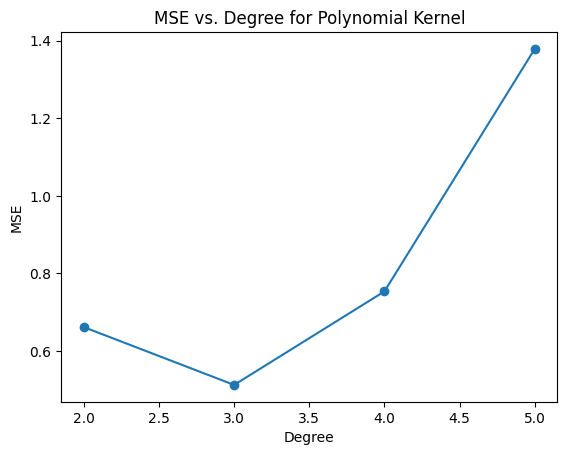

Best degree value: 3


In [46]:
import matplotlib.pyplot as plt

degrees = Polynomial_params['degree']
polynomial_mse_scores = []

for deg in degrees:
  model = SVR(kernel = 'poly', degree = deg, C = 1.0, epsilon = 0.1)
  model.fit(X_train, Y_train)
  model_prediction = model.predict(X_val)
  mse = mean_squared_error(Y_val, model_prediction)
  polynomial_mse_scores.append(mse)

# Display the plot
plt.plot(degrees, polynomial_mse_scores, marker = 'o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs. Degree for Polynomial Kernel')
plt.show()

# Report the best value of the polynomial degree
best_degree_value = degrees[polynomial_mse_scores.index(min(polynomial_mse_scores))]
print(f'Best degree value: {best_degree_value}')

7.   Plot the MSE vs. gamma value for the RBF kernel, and report the best value of gamma. **[2 marks]**


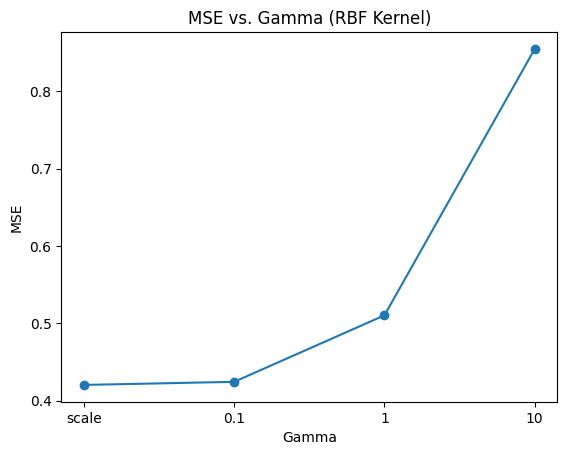

Best gamma value: scale


In [47]:
gamma = RBF_params['gamma']
rbf_mse_scores = []

for gm in gamma:
  model = SVR(kernel = 'rbf', gamma = gm, C = 1.0, epsilon = 0.1)
  model.fit(X_train, Y_train)
  model_prediction = model.predict(X_val)
  mse = mean_squared_error(Y_val, model_prediction)
  rbf_mse_scores.append(mse)

# Display the plot
plt.plot(gamma, rbf_mse_scores, marker = 'o')
plt.xlabel('Gamma')
plt.ylabel('MSE')
plt.title('MSE vs. Gamma (RBF Kernel)')
plt.show()

# report the best value of gamma
best_gamma_value = gamma[rbf_mse_scores.index(min(rbf_mse_scores))]
print(f'Best gamma value: {best_gamma_value}')

8.  Obtain the predictions for the best SVR model you obtained (out of all the SVRs with Polynomial and RBF kernels), and show the scatter plot of the predictions vs. the ground truth number of shares. **[2 marks]**

Best SVR model: RBF kernel
MSE: 0.18526732638623336


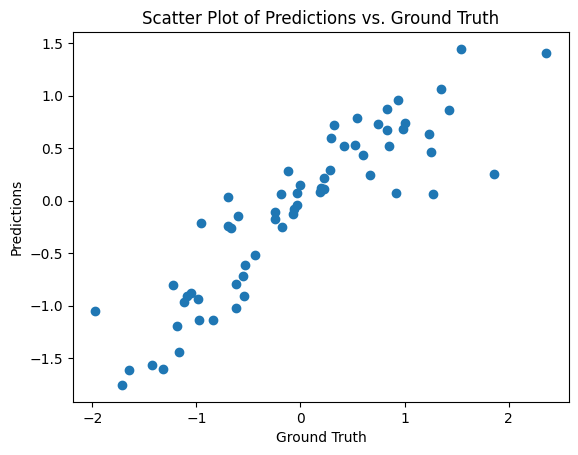

In [48]:
if rbf_mse_scores < polynomial_mse_scores:
  best_model = SVR(kernel = 'rbf', gamma = best_rbf_gamma, C = 1.0, epsilon = 0.1)
  print(f'Best SVR model: RBF kernel')
else:
  best_model = SVR(kernel = 'poly', degree = best_polynomial_degree, C = 1.0, epsilon = 0.1)
  print(f'Best SVR model: Polynomial kernel')

best_model.fit(X_train, Y_train)
best_model_prediction = best_model.predict(X_test)
mse = mean_squared_error(Y_test, best_model_prediction)
print(f'MSE: {mse}')

# Display the scatter plot
plt.scatter(Y_test, best_model_prediction)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Scatter Plot of Predictions vs. Ground Truth')
plt.show()
